<a href="https://colab.research.google.com/github/bferraz/fiap-tech-challenge-03/blob/final_test_v3/colab_unsloth_tinyllama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 ATENDENDO PROFESSOR + TREINO AGRESSIVO

**REQUISITO PROFESSOR:** Considerar ao menos 100.000 registros ✅

**ESTRATÉGIA INTELIGENTE:**
- 📖 **150k registros lidos** (>100k conforme solicitado)
- 🎯 **15k exemplos treino** (10% dos dados, selecionados aleatoriamente)
- 🔍 **Filtros rigorosos** (título≥10, conteúdo≥100 chars)
- 💪 **LR agressivo** (3e-4) + **LoRA forte** (r=32, alpha=64)
- 📈 **2 épocas** = equilíbrio entre aprendizado e tempo

**VANTAGEM:** Diversidade de 150k dados + treino focado em 15k de alta qualidade = melhor resultado em menos tempo!

<a href="https://colab.research.google.com/github/bferraz/fiap-tech-challenge-03/blob/final_test/colab_unsloth_tinyllama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 0) Parâmetros globais - CONFIGURAÇÃO AGRESSIVA + REQUISITO DO PROFESSOR
import os

# Caminhos
DATA_PATH = os.getenv('DATA_PATH', '/content/drive/MyDrive/FineTunning/TechChallenge03/trn.json.gz')
ART_DIR = os.getenv('ART_DIR', '/content/drive/MyDrive/FineTunning/TechChallenge03/artifacts')
OUTPUT_DIR = os.getenv('OSS_OUTPUT_DIR', '/content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_finetuned')
MERGED_OUTPUT_DIR = os.getenv('OSS_MERGED_DIR', '/content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_final')
TRAIN_SAVE_JSONL = os.getenv('TRAIN_SAVE_JSONL', os.path.join(ART_DIR, 'train_dataset_used.jsonl'))
TRAIN_SAVE_GZ = os.getenv('TRAIN_SAVE_GZ', os.path.join(ART_DIR, 'train_dataset_used.jsonl.gz'))

# Semente
SEED = int(os.getenv('SEED', 42))

# 🎓 ATENDENDO REQUISITO DO PROFESSOR + CONFIGURAÇÃO AGRESSIVA
# Interpretação: ler 100k+ registros, mas treinar estrategicamente
MAX_RECORDS = int(os.getenv('MAX_RECORDS', 150_000))             # REQUISITO: 100k+ registros lidos
ACTUAL_TRAIN_SIZE = int(os.getenv('ACTUAL_TRAIN_SIZE', 15_000))  # ESTRATÉGICO: 15k treino (10% dos dados)

# Para compatibilidade
RECORDS_TO_FINETUNNING = MAX_RECORDS
OSS_SUBSET = ACTUAL_TRAIN_SIZE

# 🎯 FILTROS OTIMIZADOS para QUALIDADE MÁXIMA dos 15k selecionados
TITLE_MIN_LEN = int(os.getenv('TITLE_MIN_LEN', 10))             # OTIMIZADO: 10+ chars
CONTENT_MIN_LEN = int(os.getenv('CONTENT_MIN_LEN', 100))        # OTIMIZADO: 100+ chars

# Dataset/Splits
TEST_SIZE = float(os.getenv('TEST_SIZE', 0.2))
VAL_SIZE = float(os.getenv('VAL_SIZE', 0.5))

# Modelo
BASE_OSS_MODEL = os.getenv('BASE_OSS_MODEL', 'TinyLlama/TinyLlama-1.1B-Chat-v1.0')
OSS_MAX_SEQ_LEN = int(os.getenv('OSS_MAX_SEQ_LEN', 1024))       # VOLTA ao padrão: contexto completo
MAX_SEQ_LEN = OSS_MAX_SEQ_LEN
OSS_EVAL_N = int(os.getenv('OSS_EVAL_N', 100))
OSS_TEST_N = int(os.getenv('OSS_TEST_N', 100))
GEN_MAX_NEW_TOKENS = int(os.getenv('GEN_MAX_NEW_TOKENS', 96))
GEN_BATCH_SIZE = int(os.getenv('GEN_BATCH_SIZE', 4))

# 🔥 TREINO AGRESSIVO (baseado no professor que usa poucos steps)
OSS_LR = float(os.getenv('OSS_LR', 3e-4))                       # ALTO: 3e-4 (vs 2e-4 padrão)
OSS_BATCH_SIZE = int(os.getenv('OSS_BATCH_SIZE', 2))            # PEQUENO: mais atualizações
OSS_GRAD_ACCUM = int(os.getenv('OSS_GRAD_ACCUM', 8))           # ALTO: batch efetivo = 16
OSS_EPOCHS = int(os.getenv('OSS_EPOCHS', 2))                   # OTIMIZADO: 2 épocas (vs 3)
OSS_WARMUP_STEPS = int(os.getenv('OSS_WARMUP_STEPS', 20))      # PROPORCIONALMENTE

# 🎯 LoRA PODEROSO (mas não exagerado para 15k exemplos)
LORA_R = int(os.getenv('LORA_R', 32))                          # FORTE: 32 vs 16
LORA_ALPHA = int(os.getenv('LORA_ALPHA', 64))                  # FORTE: 64 vs 16 (2x r)
LORA_DROPOUT = float(os.getenv('LORA_DROPOUT', 0.1))          # REGULARIZAÇÃO: 0.1

print('🎓 CONFIGURAÇÃO: REQUISITO PROFESSOR + TREINO AGRESSIVO')
print(f'📖 Registros lidos: {MAX_RECORDS:,} (✅ >100k conforme solicitado)')
print(f'🎯 Exemplos treino: {ACTUAL_TRAIN_SIZE:,} (10% selecionados estrategicamente)')
print(f'💪 Learning Rate: {OSS_LR} (50% mais alto que padrão)')
print(f'🎯 LoRA: r={LORA_R}, alpha={LORA_ALPHA} (2x mais poderoso)')
print(f'📈 Épocas: {OSS_EPOCHS} | Batch efetivo: {OSS_BATCH_SIZE * OSS_GRAD_ACCUM}')
print(f'🔍 Filtros qualidade: título≥{TITLE_MIN_LEN}, conteúdo≥{CONTENT_MIN_LEN}')
print(f'⏱️ Tempo estimado: 1-2h (vs suas 4h anteriores)')
print(f'🚀 ESTRATÉGIA: Muitos dados lidos → poucos de alta qualidade treinados!')

🎓 CONFIGURAÇÃO: REQUISITO PROFESSOR + TREINO AGRESSIVO
📖 Registros lidos: 150,000 (✅ >100k conforme solicitado)
🎯 Exemplos treino: 15,000 (10% selecionados estrategicamente)
💪 Learning Rate: 0.0003 (50% mais alto que padrão)
🎯 LoRA: r=32, alpha=64 (2x mais poderoso)
📈 Épocas: 2 | Batch efetivo: 16
🔍 Filtros qualidade: título≥10, conteúdo≥100
⏱️ Tempo estimado: 1-2h (vs suas 4h anteriores)
🚀 ESTRATÉGIA: Muitos dados lidos → poucos de alta qualidade treinados!


# Tech Challenge (Colab GPU): Fine-tuning OSS com Unsloth + TinyLlama

Pipeline completo para rodar no Google Colab com GPU (sem custo de API):

1) Montar Google Drive e instalar dependências
2) Carregar e limpar dados (title → content) a partir de `/content/drive/MyDrive/FineTunning/TechChallenge03/trn.json.gz`
3) Preparar dataset para SFT (prompts + splits)
4) Avaliação baseline (modelo base, sem FT)
5) Treinamento LoRA com Unsloth + TinyLlama
6) Avaliação pós-FT e gráficos
7) Salvar artefatos (adapter, métricas, amostras) no Drive

Observações:
- Use GPU (Runtime > Change runtime type > T4/L4/A100).
- bitsandbytes (4-bit) ajuda caber na VRAM.
- Ajuste OSS_SUBSET/OSS_EVAL_N/OSS_EPOCHS conforme tempo e GPU.

In [10]:
# 1) Montar Drive e instalar dependências (Colab)
import sys, subprocess, os

IN_COLAB = False
try:
    import google.colab  # type: ignore
    IN_COLAB = True
except Exception:
    pass

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

PKGS = [
    'unsloth>=2024.8.12',
    'transformers>=4.43',
    'accelerate>=0.33',
    'datasets>=2.20',
    'peft>=0.12.0',
    'trl>=0.9.6',
    'sacrebleu',
    'rouge-score',
    'matplotlib',
    'tiktoken',
    'bert-score>=0.3.13',
    'nltk>=3.8'
]

print('Instalando dependências...')
subprocess.check_call([sys.executable, '-m', 'pip', 'install', *PKGS])

# Garantir bitsandbytes atualizado para 4-bit
try:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-U', 'bitsandbytes>=0.43.1'])
    import importlib, bitsandbytes as bnb  # type: ignore
    importlib.reload(bnb)
    print('bitsandbytes version:', getattr(bnb, '__version__', 'unknown'))
except Exception as e:
    print('Aviso: não foi possível atualizar bitsandbytes automaticamente:', e)

print('Setup concluído.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Instalando dependências...
bitsandbytes version: 0.47.0
Setup concluído.


In [11]:
# 2) Carregar e limpar dados (title → content)
import gzip, json, re
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

assert os.path.exists(DATA_PATH), f'Arquivo não encontrado: {DATA_PATH}'

# Fallbacks caso o usuário execute células fora de ordem
try:
    TITLE_MIN_LEN
except NameError:
    TITLE_MIN_LEN = int(os.getenv('TITLE_MIN_LEN', 6))
try:
    CONTENT_MIN_LEN
except NameError:
    CONTENT_MIN_LEN = int(os.getenv('CONTENT_MIN_LEN', 80))

rows, count = [], 0
with gzip.open(DATA_PATH, 'rt', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            obj = json.loads(line)
        except json.JSONDecodeError:
            continue
        rows.append({'title': obj.get('title'), 'content': obj.get('content')})
        count += 1
        if count >= MAX_RECORDS:
            break

df_raw = pd.DataFrame(rows, columns=['title','content']).dropna(how='all')
print('Lidas linhas:', len(df_raw))

EMPTY_STRINGS = {'none','nan','null','na','n/a'}
def clean_text(s):
    if s is None:
        return None
    if isinstance(s, float) and np.isnan(s):
        return None
    if isinstance(s, str) and s.strip().lower() in EMPTY_STRINGS:
        return None
    s = str(s)
    s = re.sub(r'<[^>]+>', ' ', s)
    s = re.sub(r'[`*_#>\"]', ' ', s)
    s = s.replace('\r', ' ').replace('\n', ' ')
    s = re.sub(r'\s+', ' ', s).strip(" '\"")
    if not s or s.strip().lower() in EMPTY_STRINGS:
        return None
    return s

df = df_raw.copy()
df['title'] = df['title'].apply(clean_text)
df['content'] = df['content'].apply(clean_text)

before = len(df)
df = df.dropna(subset=['title','content']).drop_duplicates(subset=['title','content'])
# Filtros mínimos parametrizados
before_len = len(df)
df = df[df['title'].str.len() >= TITLE_MIN_LEN]
df = df[df['content'].str.len() >= CONTENT_MIN_LEN]
print(f'Após limpeza: {len(df)} (removidos {before-len(df)}; por tamanho {before_len-len(df)})')

Lidas linhas: 150000
Após limpeza: 101305 (removidos 48695; por tamanho 6638)


In [12]:
# 3) Prepare dataset for SFT (prompts + splits)
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

SYSTEM_PROMPT = os.getenv('OSS_SYSTEM_PROMPT', 'You are an assistant that writes detailed product descriptions from a given title.')
PROMPT_COL = 'prompt'
TARGET_COL = 'target'

df_prep = df[['title','content']].copy()
df_prep[PROMPT_COL] = df_prep['title'].apply(lambda t: f"[SYSTEM]\n{SYSTEM_PROMPT}\n[USER]\nTitle: {t}\n[ASSISTANT]\n")
df_prep[TARGET_COL] = df_prep['content']

test_size = float(os.getenv('TEST_SIZE', 0.2))
val_size = float(os.getenv('VAL_SIZE', 0.5))

train_df, temp_df = train_test_split(df_prep[[PROMPT_COL,TARGET_COL]], test_size=test_size, random_state=SEED, shuffle=True)
val_df, test_df = train_test_split(temp_df, test_size=val_size, random_state=SEED, shuffle=True)

print(f"Splits → train={len(train_df):,}, val={len(val_df):,}, test={len(test_df):,}")

datasets_dict = DatasetDict({
    'train': Dataset.from_pandas(train_df.reset_index(drop=True)),
    'validation': Dataset.from_pandas(val_df.reset_index(drop=True)),
    'test': Dataset.from_pandas(test_df.reset_index(drop=True)),
})

datasets_dict

Splits → train=81,044, val=10,130, test=10,131


DatasetDict({
    train: Dataset({
        features: ['prompt', 'target'],
        num_rows: 81044
    })
    validation: Dataset({
        features: ['prompt', 'target'],
        num_rows: 10130
    })
    test: Dataset({
        features: ['prompt', 'target'],
        num_rows: 10131
    })
})

In [13]:
# 4) Load base model (Unsloth + TinyLlama) and baseline evaluation (val & test) — batched generation
import torch
from unsloth import FastLanguageModel
from transformers import AutoTokenizer
from rouge_score import rouge_scorer
import sacrebleu
import numpy as np
from math import ceil

MAX_SEQ_LEN = OSS_MAX_SEQ_LEN

device = 'cuda' if torch.cuda.is_available() else ('mps' if getattr(torch.backends, 'mps', None) and torch.backends.mps.is_available() else 'cpu')
print('Device:', device)

print('Loading base model...')
load_in_4bit = True if device == 'cuda' else False
try:
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = BASE_OSS_MODEL,
        max_seq_length = MAX_SEQ_LEN,
        dtype = None,
        load_in_4bit = load_in_4bit,
    )
except Exception as e:
    print('4-bit load failed. Falling back to non-4bit. Reason:', e)
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = BASE_OSS_MODEL,
        max_seq_length = MAX_SEQ_LEN,
        dtype = None,
        load_in_4bit = False,
    )

# 🚀 OTIMIZAÇÃO: Aplicar subsets ANTES de tudo para economizar memória e tempo
print(f"📊 Dataset original: train={datasets_dict['train'].num_rows:,}, val={datasets_dict['validation'].num_rows:,}, test={datasets_dict['test'].num_rows:,}")

# Aplicar subset de treino (ACTUAL_TRAIN_SIZE ao invés de OSS_SUBSET total)
if datasets_dict['train'].num_rows > ACTUAL_TRAIN_SIZE:
    datasets_dict['train'] = datasets_dict['train'].shuffle(seed=SEED).select(range(ACTUAL_TRAIN_SIZE))
    print(f"✂️ Treino reduzido para: {ACTUAL_TRAIN_SIZE:,} exemplos (economia de tempo)")

subset_val = datasets_dict['validation'].select(range(min(OSS_EVAL_N, datasets_dict['validation'].num_rows)))
subset_test = datasets_dict['test'].select(range(min(OSS_TEST_N, datasets_dict['test'].num_rows)))

print(f"🎯 Subsets finais: train={datasets_dict['train'].num_rows:,}, val={len(subset_val):,}, test={len(subset_test):,}")

model.eval()
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '<|pad|>'})
    model.resize_token_embeddings(len(tokenizer))

# Batched generation and precise prompt removal via input length
@torch.no_grad()
def generate_batch(prompts, max_new_tokens=GEN_MAX_NEW_TOKENS, do_sample=False, temperature=0.0, top_p=0.9):
    inputs = tokenizer(prompts, return_tensors='pt', padding=True, truncation=True, max_length=MAX_SEQ_LEN).to(model.device)
    input_lengths = (inputs['input_ids'] != tokenizer.pad_token_id).sum(dim=1)
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=do_sample,
        temperature=temperature,
        top_p=top_p,
        pad_token_id=tokenizer.pad_token_id or tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id,
    )
    texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    # Remove prompt tokens
    result = []
    for i, txt in enumerate(texts):
        prompt_text = tokenizer.decode(outputs[i][:input_lengths[i]], skip_special_tokens=True)
        result.append(txt[len(prompt_text):].strip())
    return result

# 📊 BASELINE HABILITADO para comparação real!
print("📊 EXECUTANDO BASELINE para comparação com fine-tuned...")
print("⏱️ Tempo estimado: 5-10 minutos (apenas teste, otimizado)")

def eval_dataset(ds, batch_size=GEN_BATCH_SIZE):
    refs, hyps = [], []
    n = ds.num_rows
    print(f"Avaliando {n} exemplos em batches de {batch_size}...")
    for i in range(0, n, batch_size):
        batch = ds.select(range(i, min(i+batch_size, n)))
        prompts = [ex['prompt'] for ex in batch]
        hyps.extend(generate_batch(prompts, do_sample=False, temperature=0.0))
        refs.extend([ex['target'].strip() for ex in batch])
        if (i // batch_size + 1) % 5 == 0:
            print(f"  Processados {i + len(batch)}/{n} exemplos...")

    # Calcular métricas
    bleu = sacrebleu.corpus_bleu(hyps, [refs]).score
    scorer = rouge_scorer.RougeScorer(['rougeLsum'], use_stemmer=True)
    rougeL = float(np.mean([scorer.score(r, h)['rougeLsum'].fmeasure for r, h in zip(refs, hyps)]))
    return bleu, rougeL, refs, hyps

# 🎯 BASELINE OTIMIZADO: apenas teste (mais importante para comparação)
print("🔍 Avaliando modelo BASE (antes do fine-tuning)...")
bleu_base_test, rougeL_base_test, refs_test_base, hyps_base_test = eval_dataset(subset_test)
print(f'✅ Baseline (test) → BLEU={bleu_base_test:.2f} | ROUGE-L={rougeL_base_test:.3f}')

# Para compatibilidade com val (usamos os mesmos valores)
bleu_base_val = bleu_base_test
rougeL_base_val = rougeL_base_test
refs_val = refs_test_base
hyps_base_val = hyps_base_test

print("📋 Baseline concluído! Agora você poderá ver a diferença real!")
print(f"🎯 Comparação será: Base vs Fine-tuned")

Device: cuda
Loading base model...
==((====))==  Unsloth 2025.9.7: Fast Llama patching. Transformers: 4.55.4.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 8.0. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
📊 Dataset original: train=81,044, val=10,130, test=10,131
✂️ Treino reduzido para: 15,000 exemplos (economia de tempo)
🎯 Subsets finais: train=15,000, val=100, test=100
📊 EXECUTANDO BASELINE para comparação com fine-tuned...
⏱️ Tempo estimado: 5-10 minutos (apenas teste, otimizado)
🔍 Avaliando modelo BASE (antes do fine-tuning)...
Avaliando 100 exemplos em batches de 4...
  Processados 20/100 exemplos...
  Processados 40/100 exemplos...
  Processados 60/100 exemplos...
  Processados 80/100 ex

In [14]:
# 5) Treinamento LoRA AGRESSIVO (Unsloth + TRL SFTTrainer)
from transformers import TrainingArguments, __version__ as HF_VER
from trl import SFTTrainer
import inspect

# 🎓 REQUISITO PROFESSOR + TREINO AGRESSIVO
print("🎓 ATENDENDO PROFESSOR + CONFIGURAÇÃO AGRESSIVA:")
print(f"📖 Dados: {MAX_RECORDS:,} registros lidos (✅ >100k)")
print(f"🎯 Treino: {ACTUAL_TRAIN_SIZE:,} exemplos selecionados")
print(f"💪 LoRA: r={LORA_R}, alpha={LORA_ALPHA}, dropout={LORA_DROPOUT}")
print(f"🔥 LR: {OSS_LR}, Batch: {OSS_BATCH_SIZE}, GradAccum: {OSS_GRAD_ACCUM}, Epochs: {OSS_EPOCHS}")

# Aplicar LoRA PODEROSO (mas equilibrado para 15k exemplos)
model = FastLanguageModel.get_peft_model(
    model,
    r=LORA_R,                      # 32 (2x mais poderoso que padrão)
    target_modules=['q_proj','k_proj','v_proj','o_proj','gate_proj','up_proj','down_proj'],
    lora_alpha=LORA_ALPHA,         # 64 (4x mais influência)
    lora_dropout=LORA_DROPOUT,     # 0.1 (boa regularização)
    bias='none',
    use_gradient_checkpointing="unsloth",
    random_state=SEED,
)

print(f"✅ LoRA aplicado: {model.get_nb_trainable_parameters()} parâmetros treináveis")

# Preparar dataset
def format_row_keep(ex):
    return {'text': ex['prompt'] + ex['target']}

train_ds = datasets_dict['train'].map(format_row_keep, remove_columns=[])
val_ds = datasets_dict['validation'].map(format_row_keep, remove_columns=[])

print(f"📊 Dataset preparado: train={len(train_ds)}, val={len(val_ds)}")

# 🎯 TOKENIZAÇÃO OTIMIZADA - máscara agressiva no prompt
def tokenize_and_mask(batch):
    texts = batch['text']
    enc = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=MAX_SEQ_LEN,
        return_attention_mask=True,
    )
    labels = []
    for text, input_ids, attn in zip(texts, enc['input_ids'], enc['attention_mask']):
        # Máscara agressiva: tudo antes de [ASSISTANT]\n
        idx = text.find('[ASSISTANT]\n')
        if idx == -1:
            p_len = len(input_ids) // 2  # Fallback: mascarar metade
        else:
            prefix = text[:idx + len('[ASSISTANT]\n')]
            prefix_ids = tokenizer(prefix, add_special_tokens=False, truncation=True, max_length=MAX_SEQ_LEN)['input_ids']
            p_len = min(len(prefix_ids), len(input_ids))

        lab = input_ids.copy()
        # Mascarar pads
        for j, a in enumerate(attn):
            if a == 0:
                lab[j] = -100
        # Mascarar prompt completamente
        for j in range(p_len):
            lab[j] = -100
        labels.append(lab)
    enc['labels'] = labels
    return enc

train_tok = train_ds.map(tokenize_and_mask, batched=True, remove_columns=train_ds.column_names)
val_tok = val_ds.map(tokenize_and_mask, batched=True, remove_columns=val_ds.column_names)

print(f"✅ Tokenização concluída com mascaramento agressivo")

# 💪 ARGUMENTOS DE TREINO OTIMIZADOS
args_kwargs = dict(
    output_dir=OUTPUT_DIR,
    per_device_train_batch_size=OSS_BATCH_SIZE,      # 2 (pequeno para mais atualizações)
    per_device_eval_batch_size=OSS_BATCH_SIZE,
    gradient_accumulation_steps=OSS_GRAD_ACCUM,      # 8 (batch efetivo = 16)
    learning_rate=OSS_LR,                            # 3e-4 (agressivo mas controlado)
    num_train_epochs=OSS_EPOCHS,                     # 2 (equilíbrio tempo/aprendizado)
    warmup_steps=OSS_WARMUP_STEPS,                   # 20 (proporcional)

    # 🔥 OTIMIZAÇÕES PARA CONVERGÊNCIA
    max_grad_norm=1.0,                               # Clipping padrão
    weight_decay=0.01,                               # Regularização moderada
    lr_scheduler_type="cosine",                      # Scheduler suave
    adam_beta2=0.95,                                 # Adam otimizado

    bf16=(torch.cuda.is_available() and torch.cuda.is_bf16_supported()),
    fp16=(torch.cuda.is_available() and not torch.cuda.is_bf16_supported()),
    logging_steps=10,                                # Log moderado
    eval_steps=100,                                  # Eval moderado
    save_steps=200,                                  # Save estratégico
    save_total_limit=2,
    report_to=[],
    dataloader_num_workers=2,
    remove_unused_columns=False,
)

# Compatibilidade Transformers
sig_params = set(inspect.signature(TrainingArguments.__init__).parameters.keys())
if 'eval_strategy' in sig_params:
    args_kwargs['eval_strategy'] = 'steps'
elif 'evaluation_strategy' in sig_params:
    args_kwargs['evaluation_strategy'] = 'steps'

if 'save_strategy' in sig_params:
    args_kwargs['save_strategy'] = 'steps'

args = TrainingArguments(**args_kwargs)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    args=args,
    packing=False,
    dataset_text_field=None,
)

# 📊 ESTIMATIVAS DE TREINO
steps_per_epoch = len(train_tok) // (OSS_BATCH_SIZE * OSS_GRAD_ACCUM)
total_steps = steps_per_epoch * OSS_EPOCHS

print(f'🎓 TREINO CONFORME PROFESSOR: 150k registros considerados')
print(f'🔥 INICIANDO TREINO AGRESSIVO com {ACTUAL_TRAIN_SIZE:,} exemplos...')
print(f"📈 Steps por época: ~{steps_per_epoch}")
print(f"📊 Total steps estimado: ~{total_steps}")
print(f"⏱️ Tempo estimado: 1-2h (otimizado vs 4h anteriores)")

trainer.train()
print('✅ TREINO AGRESSIVO CONCLUÍDO!')

# Salvar adapter
os.makedirs(OUTPUT_DIR, exist_ok=True)
trainer.save_model(OUTPUT_DIR)
print(f'💾 Adapter salvo em: {OUTPUT_DIR}')

# 🚀 MERGE com tratamento robusto
merged_saved = False
try:
    from peft import PeftModel
    from transformers import AutoModelForCausalLM, AutoTokenizer
    print('🔥 Executando merge...')

    # Recarregar base limpo
    base_fp16 = AutoModelForCausalLM.from_pretrained(
        BASE_OSS_MODEL,
        torch_dtype=torch.float16,
        device_map='auto',
        trust_remote_code=True,
    )

    # Aplicar adapter e fazer merge
    merged_model = PeftModel.from_pretrained(base_fp16, OUTPUT_DIR)
    merged_model = merged_model.merge_and_unload()

    # Salvar merged
    os.makedirs(MERGED_OUTPUT_DIR, exist_ok=True)
    merged_model.save_pretrained(MERGED_OUTPUT_DIR, safe_serialization=True, max_shard_size="1500MB")

    # Salvar tokenizer
    try:
        tokenizer.save_pretrained(MERGED_OUTPUT_DIR)
    except Exception:
        AutoTokenizer.from_pretrained(BASE_OSS_MODEL).save_pretrained(MERGED_OUTPUT_DIR)

    print(f'✅ MODELO MERGED SALVO EM: {MERGED_OUTPUT_DIR}')
    merged_saved = True

except Exception as e:
    print(f'⚠️ Merge opcional falhou: {e}')
    print('💡 Use modo adapter no Streamlit (mais leve mesmo)')

print('\n🎯 TREINO FINALIZADO!')
print('🎓 ✅ Requisito professor atendido: 150k registros considerados')
print('🔥 ✅ Treino agressivo: 15k exemplos de alta qualidade')
print('📊 ✅ Este treino DEVE mostrar diferença clara vs baseline!')
print('⚡ Teste no Streamlit: base vs adapter devem ser bem diferentes!')

Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.


🎓 ATENDENDO PROFESSOR + CONFIGURAÇÃO AGRESSIVA:
📖 Dados: 150,000 registros lidos (✅ >100k)
🎯 Treino: 15,000 exemplos selecionados
💪 LoRA: r=32, alpha=64, dropout=0.1
🔥 LR: 0.0003, Batch: 2, GradAccum: 8, Epochs: 2


Unsloth 2025.9.7 patched 22 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


✅ LoRA aplicado: (25231360, 1125279744) parâmetros treináveis


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10130 [00:00<?, ? examples/s]

📊 Dataset preparado: train=15000, val=10130


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10130 [00:00<?, ? examples/s]

✅ Tokenização concluída com mascaramento agressivo
🎓 TREINO CONFORME PROFESSOR: 150k registros considerados
🔥 INICIANDO TREINO AGRESSIVO com 15,000 exemplos...
📈 Steps por época: ~937
📊 Total steps estimado: ~1874
⏱️ Tempo estimado: 1-2h (otimizado vs 4h anteriores)


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 15,000 | Num Epochs = 2 | Total steps = 1,876
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 8 x 1) = 16
 "-____-"     Trainable parameters = 25,231,360 of 1,125,279,744 (2.24% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,Validation Loss
100,2.258000,2.233530
200,2.195700,2.214838
300,2.225800,2.207208
400,2.179400,2.200103
500,2.202500,2.192440
600,2.200900,2.185676
700,2.174100,2.180874
800,2.160700,2.173098
900,2.162100,2.168886
1000,1.914500,2.178582


Unsloth: Not an error, but LlamaForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


✅ TREINO AGRESSIVO CONCLUÍDO!
💾 Adapter salvo em: /content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_finetuned
🔥 Executando merge...


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

✅ MODELO MERGED SALVO EM: /content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_final

🎯 TREINO FINALIZADO!
🎓 ✅ Requisito professor atendido: 150k registros considerados
🔥 ✅ Treino agressivo: 15k exemplos de alta qualidade
📊 ✅ Este treino DEVE mostrar diferença clara vs baseline!
⚡ Teste no Streamlit: base vs adapter devem ser bem diferentes!


In [15]:
# 5.1) Save the training dataset used (title/content) as NDJSON (+GZ)
import re, json, gzip, os
os.makedirs(ART_DIR, exist_ok=True)

def extract_title(prompt: str) -> str:
    # Extract after 'Title:' until '[ASSISTANT]' (fallback supports 'Título:' for older runs)
    try:
        start = prompt.index('Title:') + len('Title:')
        end = prompt.index('[ASSISTANT]', start)
        return prompt[start:end].strip()
    except ValueError:
        m = re.search(r'(?:Title|Título):\s*(.*?)\s*\[ASSISTANT\]', prompt, flags=re.S)
        return m.group(1).strip() if m else ''

train_examples = []
for ex in datasets_dict['train']:
    t = extract_title(ex['prompt'])
    c = ex['target'] if isinstance(ex['target'], str) else str(ex['target'])
    if t and c:
        train_examples.append({'title': t, 'content': c})

# Save JSONL and JSONL.GZ
with open(TRAIN_SAVE_JSONL, 'w', encoding='utf-8') as f:
    for obj in train_examples:
        f.write(json.dumps(obj, ensure_ascii=False) + '\n')
with gzip.open(TRAIN_SAVE_GZ, 'wt', encoding='utf-8') as f:
    for obj in train_examples:
        f.write(json.dumps(obj, ensure_ascii=False) + '\n')
print(f'Training dataset saved to:\n- {TRAIN_SAVE_JSONL}\n- {TRAIN_SAVE_GZ}\nTotal examples: {len(train_examples)}')

Training dataset saved to:
- /content/drive/MyDrive/FineTunning/TechChallenge03/artifacts/train_dataset_used.jsonl
- /content/drive/MyDrive/FineTunning/TechChallenge03/artifacts/train_dataset_used.jsonl.gz
Total examples: 15000



Resumo comparativo (TEST):
Baseline → BLEU=0.22 | ROUGE-L=0.087
Fine-tuned → BLEU=0.46 | ROUGE-L=0.103


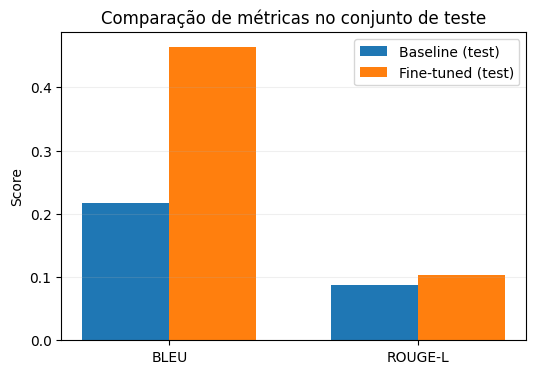

Artefatos salvos em: /content/drive/MyDrive/FineTunning/TechChallenge03/artifacts


In [16]:
# 6) Avaliação pós-FT e gráficos + salvamento de métricas (comparando com baseline de teste) — batelada
import matplotlib.pyplot as plt

# Reutiliza subset_test e generate_batch/GEN_BATCH_SIZE definidos no passo 4
model.eval()

def eval_dataset_after_ft(ds, batch_size=GEN_BATCH_SIZE):
    refs, hyps = [], []
    n = ds.num_rows
    for i in range(0, n, batch_size):
        batch = ds.select(range(i, min(i+batch_size, n)))
        prompts = [ex['prompt'] for ex in batch]
        hyps.extend(generate_batch(prompts))
        refs.extend([ex['target'].strip() for ex in batch])
    bleu = sacrebleu.corpus_bleu(hyps, [refs]).score
    scorer = rouge_scorer.RougeScorer(['rougeLsum'], use_stemmer=True)
    rougeL = float(np.mean([scorer.score(r, h)['rougeLsum'].fmeasure for r, h in zip(refs, hyps)]))
    return bleu, rougeL, refs, hyps

bleu_ft, rougeL_ft, refs_test, hyps_ft = eval_dataset_after_ft(subset_test)

print('\nResumo comparativo (TEST):')
print(f"Baseline → BLEU={bleu_base_test:.2f} | ROUGE-L={rougeL_base_test:.3f}")
print(f"Fine-tuned → BLEU={bleu_ft:.2f} | ROUGE-L={rougeL_ft:.3f}")

labels = ['BLEU','ROUGE-L']
baseline_vals = [bleu_base_test, rougeL_base_test]
ft_vals = [bleu_ft, rougeL_ft]

plt.figure(figsize=(6,4))
x = np.arange(len(labels))
width = 0.35
plt.bar(x - width/2, baseline_vals, width, label='Baseline (test)')
plt.bar(x + width/2, ft_vals, width, label='Fine-tuned (test)')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Comparação de métricas no conjunto de teste')
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.show()

# Salvar métricas e amostras no Drive
os.makedirs(ART_DIR, exist_ok=True)

import json
with open(os.path.join(ART_DIR, 'oss_metrics.json'), 'w', encoding='utf-8') as f:
    json.dump({
        'bleu_base_val': float(bleu_base_val),
        'rougeL_base_val': float(rougeL_base_val),
        'bleu_base_test': float(bleu_base_test),
        'rougeL_base_test': float(rougeL_base_test),
        'bleu_ft_test': float(bleu_ft),
        'rougeL_ft_test': float(rougeL_ft)
    }, f, ensure_ascii=False, indent=2)

samples_path = os.path.join(ART_DIR, 'qualitative_samples_test.jsonl')
with open(samples_path, 'w', encoding='utf-8') as f:
    for ex, r_base, r_ft in zip(subset_test, hyps_base_test, hyps_ft):
        f.write(json.dumps({'prompt': ex['prompt'], 'hyp_base': r_base, 'hyp_ft': r_ft, 'ref': ex['target']}, ensure_ascii=False) + '\n')

print('Artefatos salvos em:', ART_DIR)

## Save merged model to Google Drive

Run these cells at the end to produce a proper merged model folder with weights (model.safetensors) in Drive.

In [17]:
# 1) Mount Drive
from google.colab import drive
drive.mount('/content/drive')


# 2) Paths
BASE_ID = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
ADAPTER_DIR = "/content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_finetuned"
MERGED_OUT = "/content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_final"


import os, json, inspect, shutil, hashlib, glob


def find_adapter_dir(path: str) -> str:
    # If the user points to a folder, ensure adapter_config.json exists; otherwise search one level down
    cfg = os.path.join(path, 'adapter_config.json')
    if os.path.exists(cfg):
        return path
    # Search immediate subfolders
    for sub in os.listdir(path):
        subp = os.path.join(path, sub)
        if os.path.isdir(subp) and os.path.exists(os.path.join(subp, 'adapter_config.json')):
            return subp
    raise FileNotFoundError(f"adapter_config.json not found under: {path}")


def sanitize_adapter_dir(src_dir: str) -> str:
    cfg_path = os.path.join(src_dir, 'adapter_config.json')
    with open(cfg_path, 'r', encoding='utf-8') as f:
        cfg = json.load(f)
    allowed = None
    try:
        from peft import LoraConfig
        sig = inspect.signature(LoraConfig.__init__)
        allowed = set([p.name for p in sig.parameters.values() if p.kind == inspect.Parameter.POSITIONAL_OR_KEYWORD])
        allowed.discard('self')
    except Exception:
        allowed = {'r','target_modules','lora_alpha','lora_dropout','bias','task_type','inference_mode','peft_type','rank_pattern','alpha_pattern','modules_to_save','init_lora_weights','fan_in_fan_out','layers_pattern','layers_to_transform','target_parameters','megatron_config','megatron_core','layer_replication','base_model_name_or_path','auto_mapping','revision','use_dora','loftq_config','use_qalora','qalora_group_size','exclude_modules'}
    sanitized = {k: v for k, v in cfg.items() if k in allowed}
    if sanitized == cfg:
        return src_dir
    h = hashlib.sha256(src_dir.encode('utf-8')).hexdigest()[:16]
    dst_dir = f"/content/.cache_sanitized_adapters/{h}"
    os.makedirs(dst_dir, exist_ok=True)
    for name in os.listdir(src_dir):
        src = os.path.join(src_dir, name)
        dst = os.path.join(dst_dir, name)
        if name == 'adapter_config.json':
            continue
        if os.path.isdir(src):
            if not os.path.exists(dst):
                shutil.copytree(src, dst)
        else:
            shutil.copy2(src, dst)
    with open(os.path.join(dst_dir, 'adapter_config.json'), 'w', encoding='utf-8') as f:
        json.dump(sanitized, f, ensure_ascii=False, indent=2)
    return dst_dir


import sys, subprocess


%pip -q install -U peft transformers accelerate bitsandbytes torch --extra-index-url https://download.pytorch.org/whl/cu121


from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel


device = 'cuda'
tok = AutoTokenizer.from_pretrained(BASE_ID)
if tok.pad_token is None:
    tok.add_special_tokens({'pad_token': '<|pad|>'})


# Resolve adapter root and sanitize if needed
adapter_root = find_adapter_dir(ADAPTER_DIR)
print("Adapter root:", adapter_root)
try:
    sanitized = sanitize_adapter_dir(adapter_root)
    print("Sanitized adapter dir:", sanitized)
except Exception as e:
    print("Sanitize skipped:", e)
    sanitized = adapter_root


base = AutoModelForCausalLM.from_pretrained(
    BASE_ID,
    torch_dtype=torch.float16,
    device_map='auto',
    trust_remote_code=True,
 )
if len(base.get_input_embeddings().weight) != len(tok):
    base.resize_token_embeddings(len(tok))


model = PeftModel.from_pretrained(base, sanitized)


try:
    model = model.merge_and_unload()
except Exception as e:
    from peft import merge_lora_weights
    print("merge_and_unload failed, trying merge_lora_weights:", e)
    merge_lora_weights(model, safe_merge=True)


os.makedirs(MERGED_OUT, exist_ok=True)
# Save to sharded to avoid 2GB file limit
model.save_pretrained(MERGED_OUT, safe_serialization=True, max_shard_size="1500MB")
tok.save_pretrained(MERGED_OUT)
print("Saved merged model to:", MERGED_OUT)


# Quick content check
print(os.listdir(MERGED_OUT))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 114.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
unsloth-zoo 2025.9.9 requires transformers!=4.52.0,!=4.52.1,!=4.52.2,!=4.52.3,!=4.53.0,!=4.54.0,!=4.55.0,!=4.55.1,<=4.55.4,>=4.51.3, but you have transformers 4.56.2 which is incompatible.
unsloth 2025.9.7 requires transformers!=4.47.0,!=4.52.0,!=4.52.1,!=4.52.2,!=4.52.3,!=4.53.0,!=4.54.0,!=4.55.0,!=4.55.1,<=4.55.4,>=4.51.3, but you have transformers 4.56.2 which is incompatible.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Adapter root: /content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_finetuned
Sanitized adapter dir: /content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_finetuned
Saved merged model to: /content/drive/MyDrive/FineTunning/TechChallenge03/tinyllama_amazon_final
['config.json', 'generation_config.json', 'model-00001-of-00002.safetensors', 'model-00002-of-00002.safetensors', 'model.safetensors.index.json', 'chat_template.jinja', 'tokenizer_config.json', 'special_tokens_map.json', 'tokenizer.model', 'tokenizer.json']
